In [2]:
suppressMessages(library(dplyr))
suppressMessages(library(verification))
suppressMessages(library(class))
library(tree)

In [3]:
#setwd('6to Semestre')
#setwd('Temas Selectos de Matemáticas')
#setwd('Covid')
setwd("C:/Users/sole-/Documents/Tecnologia/Sexto semestre/Temas compu")
cv=read.csv("covid.csv",header=T)
cv <- na.omit(cv)
cv=cv%>%tbl_df()
cv=cv%>%filter(as.numeric(RESULTADO)<=1)
cv$FECHA_DEF = ifelse(cv$FECHA_DEF !="9999-99-99",1,0)

p = cv %>% filter(FECHA_DEF == 0) %>% summarize(p=n())  
num_negativo = p[[1]] #total de casos negativos
p = cv %>% filter(FECHA_DEF == 1) %>% summarize(p=n())
num_positivos = p[[1]] #numero de casos positivos

cv_covid_negativo = cv %>% filter(FECHA_DEF == 0)
cv_covid_positivo = cv %>% filter(FECHA_DEF == 1)
h = sample(1:num_negativo,num_positivos,replace = FALSE) #generamos numeros aleatorios
cv_int = cv_covid_negativo %>% slice(h)
cv <- bind_rows(cv_int,cv_covid_positivo)#50% que han muerto y 50% que estan vivos

#str(cv)
cv$FECHA_DEF <- as.factor(cv$FECHA_DEF)
cv$ORIGEN <- as.factor(cv$ORIGEN)
cv$SECTOR <- as.factor(cv$SECTOR)
cv$ENTIDAD_UM<- as.factor(cv$ENTIDAD_UM)
cv$SEXO <- as.factor(cv$SEXO)
cv$ENTIDAD_NAC <- as.factor(cv$ENTIDAD_NAC)
cv$ENTIDAD_RES <- as.factor(cv$ENTIDAD_RES)
cv$MUNICIPIO_RES <- as.factor(cv$MUNICIPIO_RES)
cv$TIPO_PACIENTE <- as.factor(cv$TIPO_PACIENTE)
cv$INTUBADO <- as.factor(cv$INTUBADO )
cv$NEUMONIA  <- as.factor(cv$NEUMONIA )
cv$NACIONALIDAD <- as.factor(cv$NACIONALIDAD)
cv$EMBARAZO <- as.factor(cv$EMBARAZO)
cv$HABLA_LENGUA_INDI <- as.factor(cv$HABLA_LENGUA_INDIG)
cv$DIABETES <- as.factor(cv$DIABETES)
cv$EPOC <- as.factor(cv$EPOC)
cv$ASMA <- as.factor(cv$ASMA)
cv$INMUSUPR  <- as.factor(cv$INMUSUPR  )
cv$HIPERTENSION   <- as.factor(cv$HIPERTENSION  )
cv$OTRA_CON <- as.factor(cv$OTRA_COM)
cv$CARDIOVASCULAR <- as.factor(cv$CARDIOVASCULAR)
cv$OBESIDAD  <- as.factor(cv$OBESIDAD )
cv$RENAL_CRONICA  <- as.factor(cv$RENAL_CRONICA )
cv$TABAQUISMO <- as.factor(cv$TABAQUISMO)
cv$OTRO_CASO  <- as.factor(cv$OTRO_CASO  )
cv$RESULTADO    <- as.factor(cv$RESULTADO  )
cv$MIGRANTE <- as.factor(cv$MIGRANTE)
cv$UCI <- as.factor(cv$UCI)
cv$FECHA_DEF = as.factor(cv$FECHA_DEF)
attach(cv)
#str(cv)
index <- sample(1:dim(cv), (dim(cv)/2), replace = F)
Train <- cv[index,]
Test <- cv[-index,]


Warning message in 1:dim(cv):
"numerical expression has 2 elements: only the first used"



Call:
glm(formula = FECHA_DEF ~ SEXO + NEUMONIA + OBESIDAD + HIPERTENSION + 
    DIABETES + EDAD + INTUBADO + UCI + EPOC + OTRO_CASO + OTRA_CON, 
    family = "binomial", data = Train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-3.12711  -0.41796   0.09941   0.57690   2.67454  

Coefficients: (2 not defined because of singularities)
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)     0.230660   0.251231   0.918 0.358556    
SEXO2           0.416420   0.050747   8.206 2.29e-16 ***
NEUMONIA2      -1.550156   0.054986 -28.192  < 2e-16 ***
OBESIDAD2      -0.359955   0.057611  -6.248 4.16e-10 ***
OBESIDAD98      0.635597   0.438714   1.449 0.147401    
HIPERTENSION2  -0.208310   0.057131  -3.646 0.000266 ***
HIPERTENSION98 -1.753097   0.662785  -2.645 0.008168 ** 
DIABETES2      -0.343652   0.057507  -5.976 2.29e-09 ***
DIABETES98     -0.525277   0.700094  -0.750 0.453077    
EDAD            0.048610   0.001792  27.119  < 2e-16 ***
INTUBAD

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


[1] 0.38

[1] 0.8511161

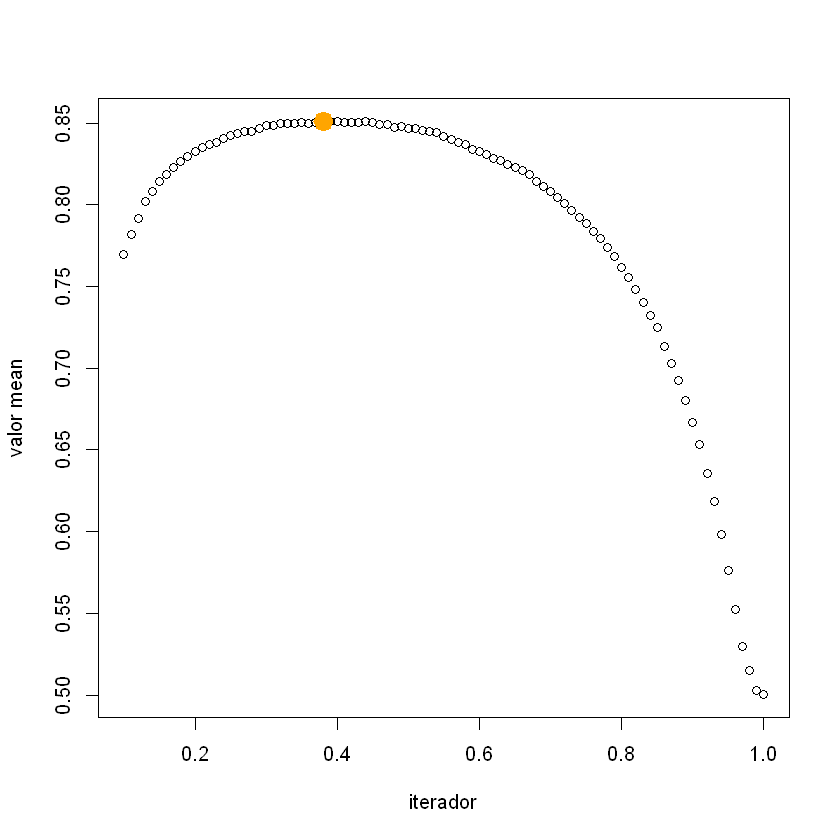

In [4]:
##########LOGISTIC######
  glm1<- glm(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = Train)
  summary(glm1)
  yhat2<- predict(glm1, Test,type="response")
  #para elegir la mejor y evaluamos los posibles valores, desde 0.1 hasta 1 y vemos cual es el mean menor 
  #se repite 91 veces 
  size=1
  val_mean <- rep(0,91)
  for(i in seq(0.1,1,by=0.01)){
    y=as.integer(yhat2>i)
    y=ifelse(y =="0",0,1)
    val_mean[size]=mean(y == Test$FECHA_DEF)
    size=size+1
  }
  size=2
  lugar=1
  mejor=val_mean[lugar]
  for(i in seq(0.11,1,by=0.01)){
    if(val_mean[size]>mejor){
      mejor=val_mean[size]
      b=i
      lugar=size
    }
    size=size+1
  }
  y=seq(0.1,1,by=0.01)
  plot(y,val_mean,xlab = "iterador", ylab = "valor mean")
  points(b, val_mean[lugar],  col = "orange", lwd = 10)
 ###valores elegidos
   b
  val_mean[lugar]

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misl

[1] 0.84958

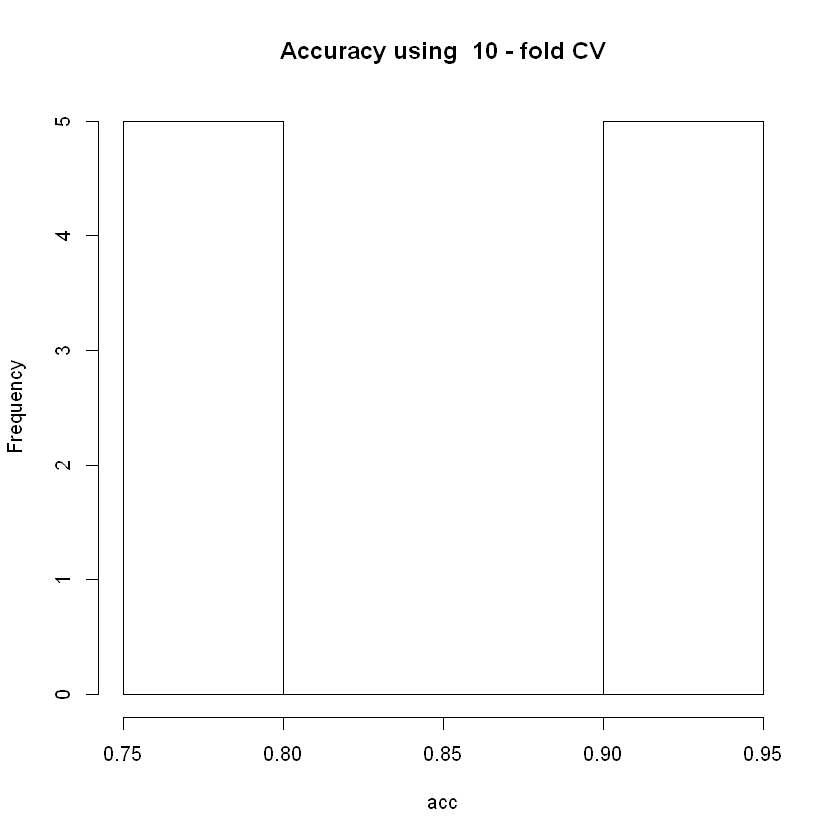

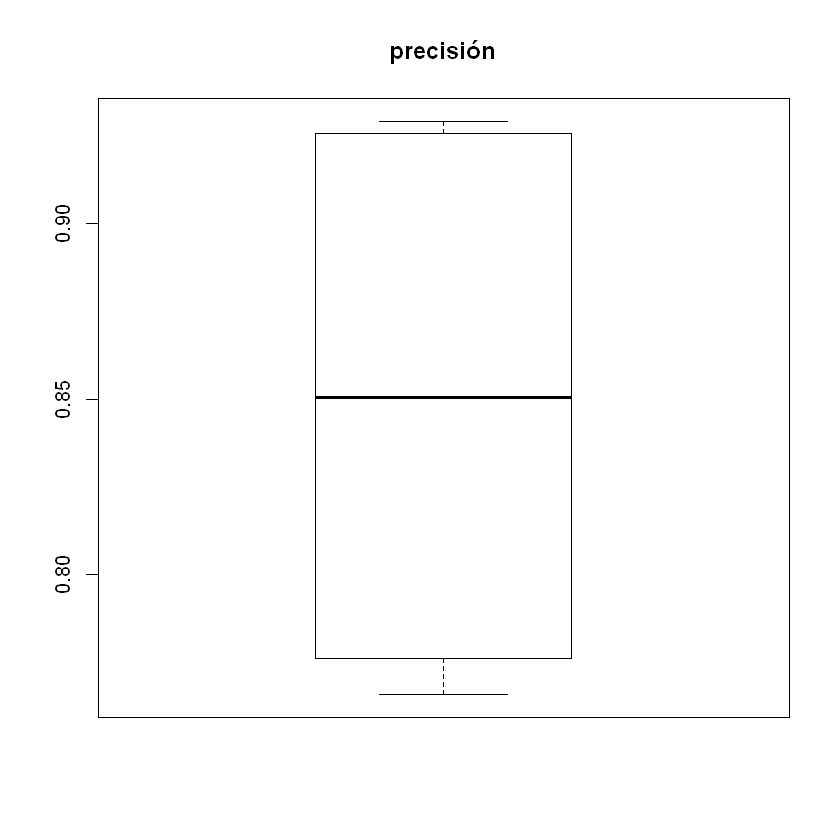

In [5]:
#################### k-folds glm
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = glm.c <-glm(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  yhat = predict(reg,test,type = "response")
  res = ifelse(yhat >b,1,0) #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="precisión")



In [7]:
#######LDA#####
lda1 <- lda(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = Train)
lda1
yhat1 <- predict(lda1, Test)$class
yhat1

table(yhat1,Test$FECHA_DEF)
mean(yhat1 == Test$FECHA_DEF)


Warning message in lda.default(x, grouping, ...):
"variables are collinear"


Call:
lda(FECHA_DEF ~ SEXO + NEUMONIA + OBESIDAD + HIPERTENSION + DIABETES + 
    EDAD + INTUBADO + UCI + EPOC + OTRO_CASO + OTRA_CON, data = Train, 
    family = "binomial")

Prior probabilities of groups:
        0         1 
0.4997611 0.5002389 

Group means:
      SEXO2 NEUMONIA2 OBESIDAD2  OBESIDAD98 HIPERTENSION2 HIPERTENSION98
0 0.5422756 0.8090425 0.8009835 0.004917361     0.8127305    0.006146701
1 0.6580240 0.2315775 0.7254367 0.011053493     0.5690502    0.006550218
  DIABETES2  DIABETES98     EDAD INTUBADO2 INTUBADO97   INTUBADO99      UCI2
0 0.8511132 0.006010108 44.13864 0.2436826  0.7412922 0.0001365934 0.2406775
1 0.6176310 0.006959607 60.62732 0.7137009  0.1091703 0.0013646288 0.7553221
      UCI97        UCI99    EPOC2      EPOC98 OTRO_CASO2 OTRO_CASO99 OTRA_CON2
0 0.7412922 0.0001365934 0.979511 0.005053954  0.3085644   0.3287802 0.9648955
1 0.1091703 0.0013646288 0.939274 0.007505459  0.3399290   0.5485808 0.9425491
   OTRA_CON98
0 0.006283295
1 0.010371179

Coeffic

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
   [37] 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0
   [73] 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
  [109] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
  [253] 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1
  [289] 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0
  [325] 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 1
  [361] 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1
  [397] 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1
  [433] 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 1
  [505] 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
  [577] 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0
  [613] 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0
  [649] 1 0 0 0 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0
  [685] 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0
  [757] 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0
  [829] 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0
  [865] 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
  [901] 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1
  [937] 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
  [973] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 [1009] 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 [1045] 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0
 [1117] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0
 [1153] 0 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0
 [1189] 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 [1261] 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 [1297] 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1
 [1333] 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0
 [1369] 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1
 [1405] 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 [1441] 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 [1513] 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0
 [1585] 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 [1621] 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1
 [1693] 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 [18

     
yhat1    0    1
    0 5824  743
    1 1504 6578

[1] 0.8466107

Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"


[1] 0.8419349

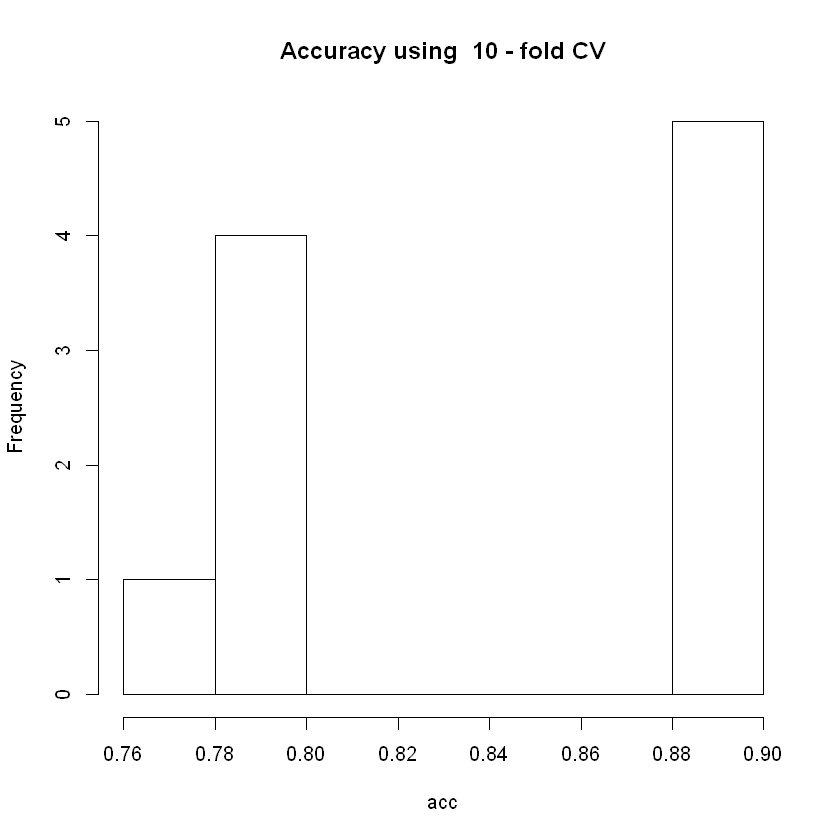

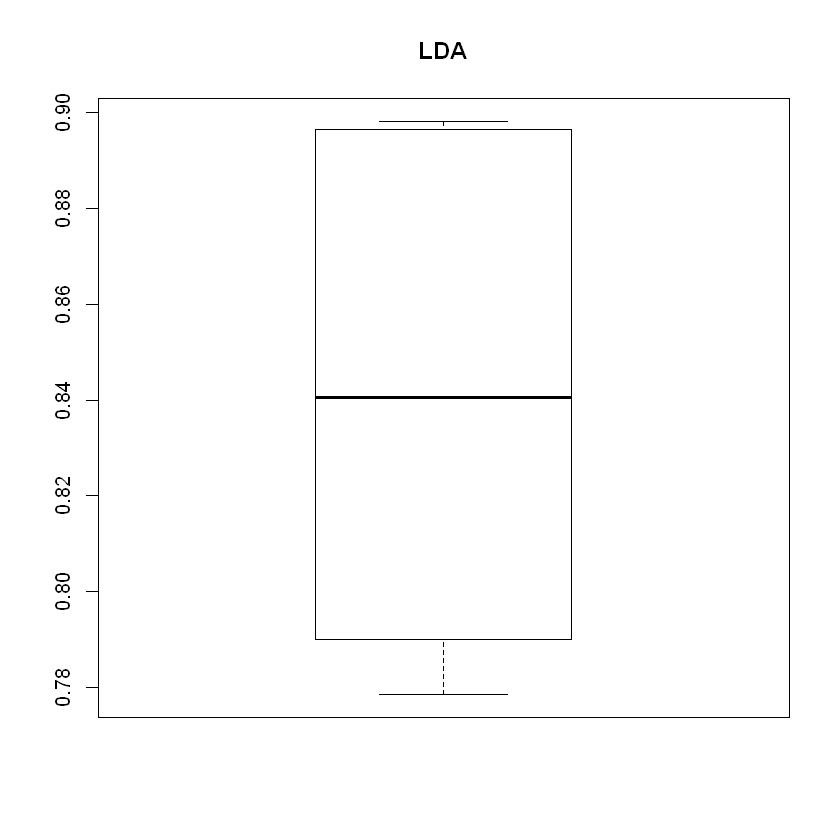

In [10]:
######kfolds lda
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg = lda(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,family="binomial" ,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test)$class #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="LDA",xlabel="Precisión")

[1] "la mejor k fue: "


[1] 18

[1] 0.8419005

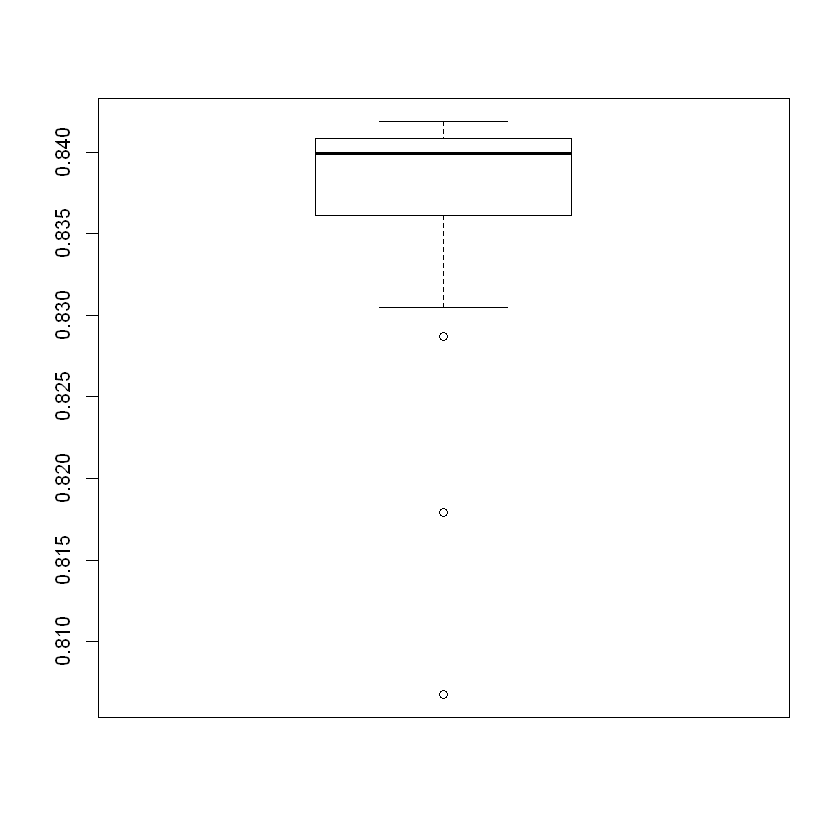

In [8]:
#############KNN#####
knn_val <- rep(1:20)
end= nrow(cv_covid_positivo)#numero de valores
mayor=0
for(n in 1:20){
  knn.pred <- knn(cbind(Train$SEXO,Train$NEUMONIA,Train$OBESIDAD,Train$HIPERTENSION,Train$DIABETES,
                        Train$EDAD,Train$INTUBADO,Train$UCI,Train$EPOC,Train$OTRO_CASO,Train$OTRA_CON), 
                  cbind(Test$SEXO,Test$NEUMONIA,Test$OBESIDAD,Test$HIPERTENSION,Test$DIABETES,
                        Test$EDAD,Test$INTUBADO,Test$UCI,Test$EPOC,Test$OTRO_CASO,Test$OTRA_CON), 
                  Train$FECHA_DEF, k=n)
  error= mean(Test$FECHA_DEF == knn.pred)
  knn_val[n]=error
  if(error>mayor){
    mayor=error
    k_best=n
  }
}
print("la mejor k fue: ")
k_best
mayor   
boxplot(knn_val)


Classification tree:
tree(formula = FECHA_DEF ~ SEXO + NEUMONIA + OBESIDAD + HIPERTENSION + 
    DIABETES + EDAD + INTUBADO + UCI + EPOC + OTRO_CASO + OTRA_CON, 
    data = Train)
Variables actually used in tree construction:
[1] "INTUBADO" "NEUMONIA" "EDAD"    
Number of terminal nodes:  5 
Residual mean deviance:  0.8012 = 11730 / 14640 
Misclassification error rate: 0.1698 = 2488 / 14649 

         
tree.pred    0    1
        0 5238  294
        1 2090 7027

[1] 0.8372585

[1] "size"   "dev"    "k"      "method"

$size
[1] 5 3 2 1

$dev
[1] 2488 2488 2694 7518

$k
[1] -Inf    0  206 4627

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

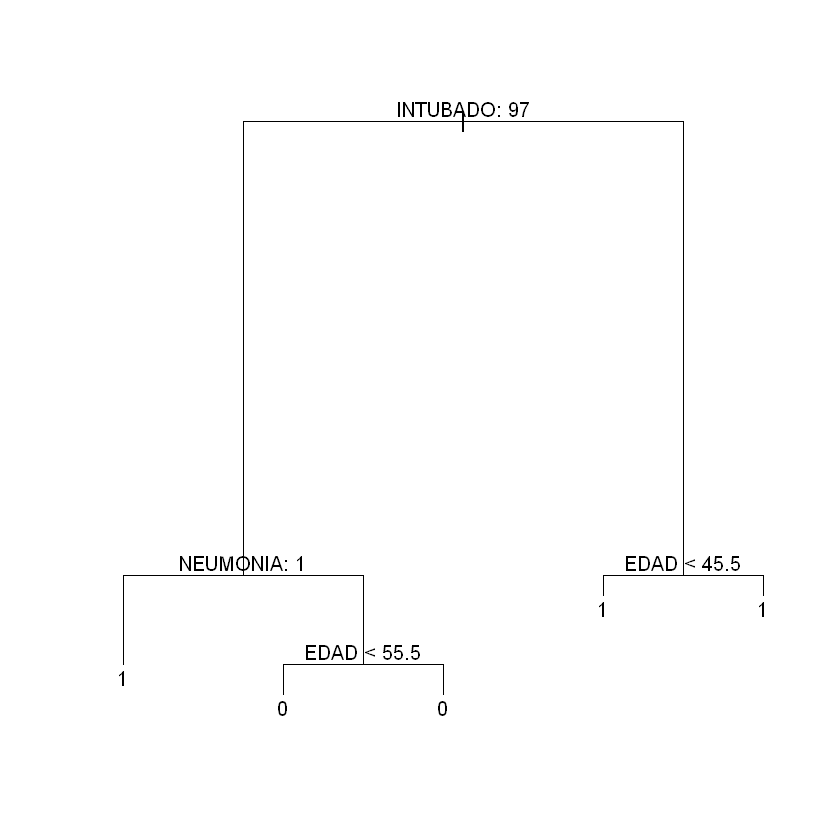

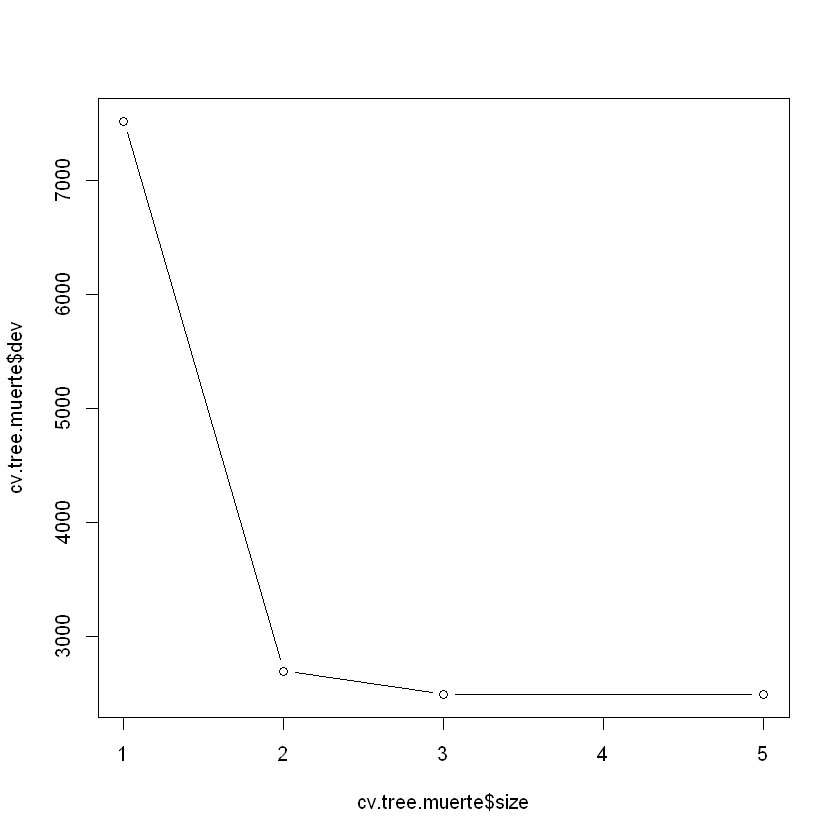

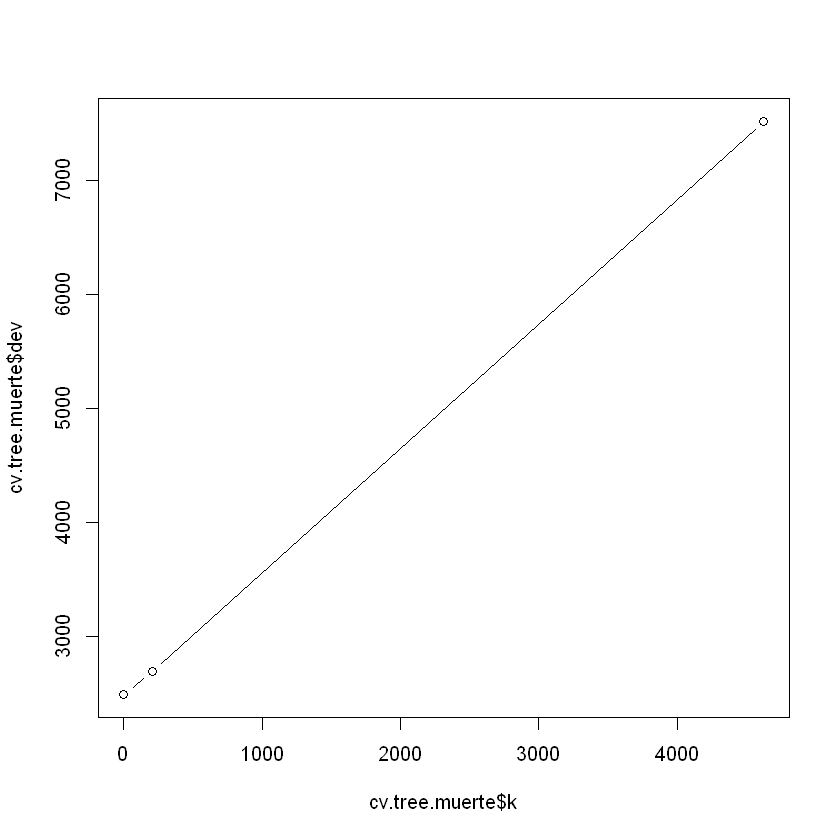

In [9]:
######## desicion tree####
tree.muerte = tree(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,data = Train)
summary(tree.muerte)
plot(tree.muerte)
text(tree.muerte, pretty=0)
tree.pred = predict(tree.muerte, Test, type="class")
table(tree.pred,Test$FECHA_DEF)
mean(tree.pred==Test$FECHA_DEF)

cv.tree.muerte = cv.tree(tree.muerte, FUN = prune.misclass)
names(cv.tree.muerte)
cv.tree.muerte
plot(cv.tree.muerte$size, cv.tree.muerte$dev,type="b")
plot(cv.tree.muerte$k,cv.tree.muerte$dev,type="b")


[1] 0.8337085

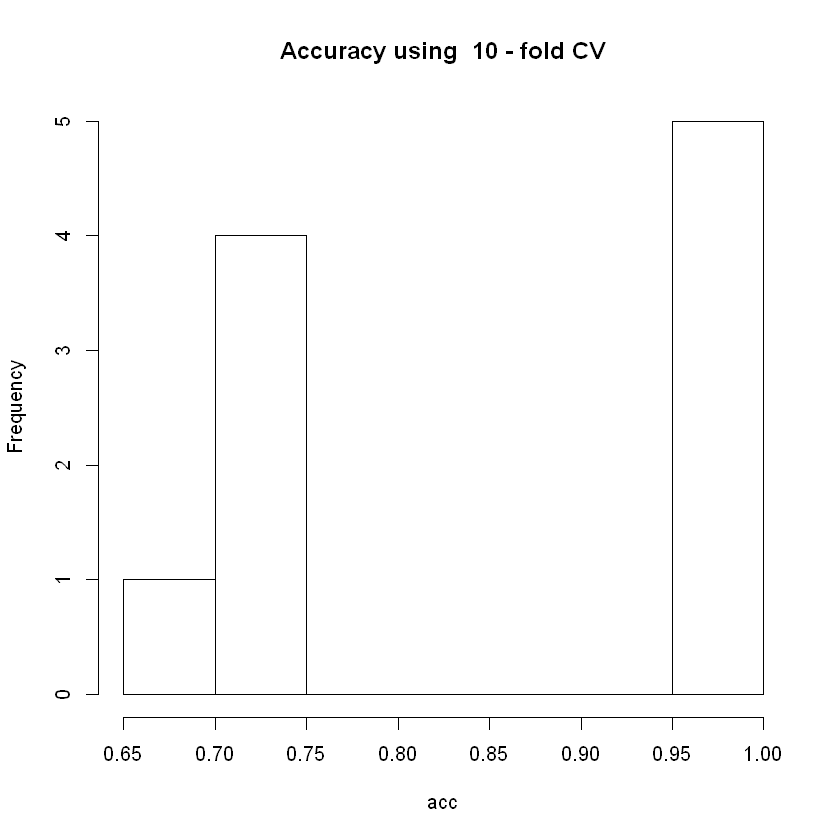

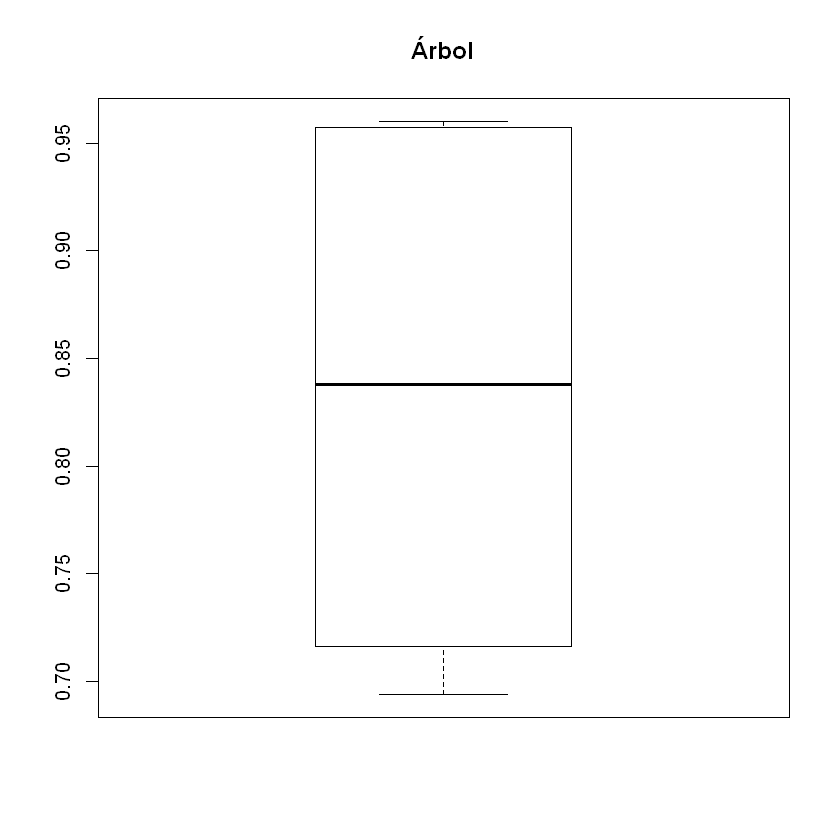

In [10]:
#######kfolds desicion tree
n <- dim(cv)[1]
k <- 10


folds <- cut(1:n,k,labels = F)
acc = rep(0,k) #presicion del modelo
for (i in 1:k){
  index = folds == i
  test = cv[index,]
  train = cv[-index,]
  reg =tree(FECHA_DEF~ SEXO+NEUMONIA+OBESIDAD+HIPERTENSION+DIABETES+EDAD+INTUBADO+UCI+EPOC+OTRO_CASO+OTRA_CON,data = train)
  
  y = test$FECHA_DEF
  res = predict(reg, test, type="class") #Si yhat > 0.5 entonces 1, si no 0
  
  clasiferror <- mean(y != res)
  
  acc[i] = 1 - clasiferror
}
mean(acc) #Presicion promedio del modelo

hist(acc, main = paste("Accuracy using ", k, "- fold CV"))
boxplot(acc,main="Árbol",xlabel="Precisión")